In [291]:
pip install scikit-fuzzy

In [292]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl


In [293]:
#Variaveis de Entrada (Antecedent)
comer = ctrl.Antecedent(np.arange(0, 11,1), 'comer')
saudavel = ctrl.Antecedent(np.arange(0, 11,1), 'saudavel')
atvFisica = ctrl.Antecedent(np.arange(0, 11,1), 'atvFisica')

In [294]:
#Variaveis de saída (Consequent)
saude = ctrl.Consequent(np.arange(0,11,1), 'saude')



In [295]:
# automf -> Atribuição de categorias automaticamente
comer.automf(names=['pouco','muito','regularmente'],)
saudavel.automf(names=['besteira','equilibrado','vegano'])
atvFisica.automf(names=['sedentarismo','regular','atleta'])

In [296]:
# Atribuição manual de funções de pertinência para a variável de saída "saida"
saude['magro'] = fuzz.trapmf(saude.universe, [0, 0, 4, 6])
saude['fitness'] = fuzz.trapmf(saude.universe, [4, 6, 8, 10])
saude['obeso'] = fuzz.trapmf(saude.universe, [8, 10, 10, 10])

In [297]:
# # atribuicao sem o automf
# saude['magro'] = fuzz.gaussmf(saude.universe,0,.1)
# saude['fitness'] = fuzz.gaussmf(saude.universe,.1,3)
# saude['obeso'] = fuzz.gaussmf(saude.universe,15,.5)


In [298]:
# # atribuicao triangular
# saude['magro'] = fuzz.trimf(saude.universe, [0, 3,6])
# saude['fitness'] = fuzz.trimf(saude.universe,[4, 6, 8])
# saude['obeso'] = fuzz.trimf(saude.universe, [8, 10, 12])

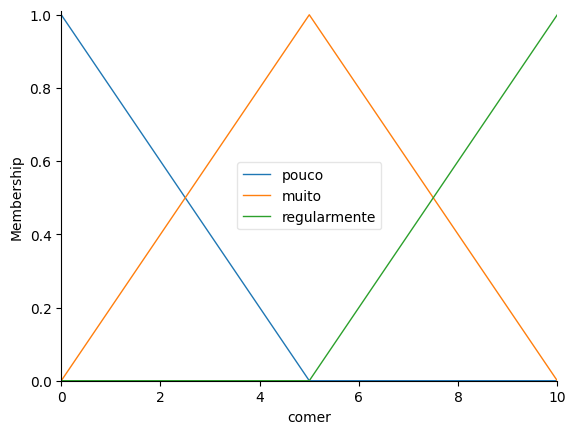

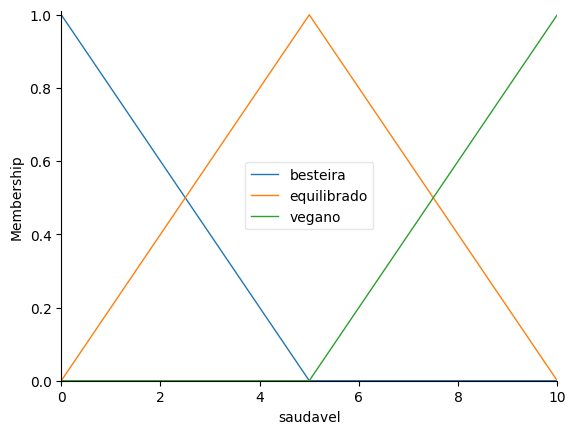

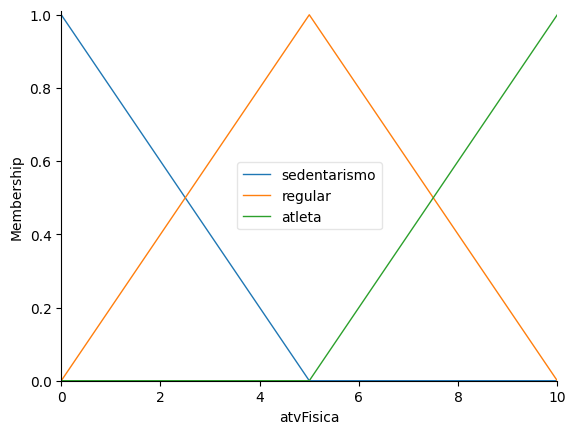

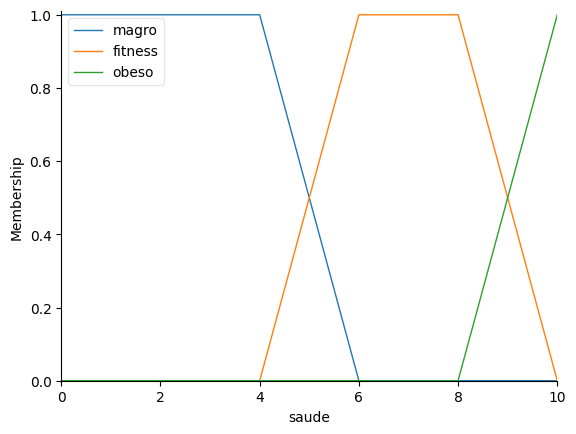

In [299]:
#Visualizando as variáveis
comer.view()
saudavel.view()
atvFisica.view()
saude.view()

In [300]:
# regras =  [
#     ctrl.Rule(comer['pouco'] & saudavel['besteira'], saude['obeso']),
#     ctrl.Rule(comer['pouco'] & saudavel['equilibrado'], saude['fitness']),
#     ctrl.Rule(comer['pouco'] & saudavel['vegano'], saude['magro']),

#     ctrl.Rule(comer['muito'] & saudavel['besteira'], saude['obeso']),
#     ctrl.Rule(comer['muito'] & saudavel['vegano'], saude['fitness']),
#     ctrl.Rule(comer['regularmente'] & saudavel['besteira'], saude['obeso']),
#     ctrl.Rule(comer['regularmente'] & saudavel['equilibrado'], saude['fitness']),
#     ctrl.Rule(comer['regularmente'] & saudavel['vegano'], saude['fitness']),
#     ctrl.Rule(comer['pouco'] & saudavel['besteira'], saude['magro']),
#     ctrl.Rule(comer['muito'] & saudavel['besteira'], saude['magro']),
#     ctrl.Rule(comer['regularmente'] & saudavel['besteira'], saude['magro']),
#     ctrl.Rule(comer['pouco'] & saudavel['besteira'], saude['magro']),
#     ctrl.Rule(comer['muito'] & saudavel['besteira'], saude['magro']),
#     ctrl.Rule(comer['muito'] & saudavel['equilibrado'], saude['fitness']),
#     ctrl.Rule(comer['muito'] & saudavel['vegano'], saude['fitness']),
#     ctrl.Rule(comer['regularmente'] & saudavel['equilibrado'], saude['fitness']),
#     ctrl.Rule(comer['muito'] & saudavel['vegano'], saude['fitness']),
#     ctrl.Rule(comer['pouco'] & saudavel['vegano'], saude['magro']),
#     ctrl.Rule(comer['pouco'] & saudavel['equilibrado'], saude['magro']),
#     ctrl.Rule(comer['pouco'] & saudavel['equilibrado'], saude['fitness']),
#     ctrl.Rule(comer['muito'] & saudavel['equilibrado'], saude['obeso']),
#     ctrl.Rule(comer['regularmente'] & saudavel['equilibrado'], saude['magro']),
#     ctrl.Rule(comer['regularmente'] & saudavel['equilibrado'], saude['fitness']),
# ]
# controlador = ctrl.ControlSystem(regras)

In [301]:
# Criando as regras
regras =  [
     ctrl.Rule(comer['pouco'] & saudavel['besteira']&atvFisica['sedentarismo'],saude['obeso']),
     ctrl.Rule(comer['pouco'] & saudavel['equilibrado']& atvFisica['regular'],saude['fitness']),
     ctrl.Rule(comer['pouco'] & saudavel['vegano']&atvFisica['atleta'],saude['magro']),

     ctrl.Rule(comer['muito'] & saudavel['besteira']& atvFisica['sedentarismo'],saude['obeso']),
     ctrl.Rule(comer['muito'] & saudavel['vegano']& atvFisica['atleta'],saude['fitness']),
     ctrl.Rule(comer['regularmente'] & saudavel['besteira']& atvFisica['sedentarismo'],saude['obeso']),
     ctrl.Rule(comer['regularmente'] & saudavel['equilibrado']&atvFisica['regular'],saude['fitness']),
     ctrl.Rule(comer['regularmente'] & saudavel['vegano']& atvFisica['atleta'],saude['fitness']),
     ctrl.Rule(comer['pouco'] & saudavel['besteira']&atvFisica['regular'],saude['magro']),
     ctrl.Rule(comer['muito'] & saudavel['besteira']& atvFisica['regular'],saude['magro']),
     ctrl.Rule(comer['regularmente'] & saudavel['besteira']&atvFisica['regular'],saude['magro']),
     ctrl.Rule(comer['pouco'] & saudavel['besteira']& atvFisica['atleta'],saude['magro']),
     ctrl.Rule(comer['muito'] & saudavel['besteira']& atvFisica['atleta'],saude['magro']),
     ctrl.Rule(comer['muito'] & saudavel['equilibrado'] & atvFisica['regular'], saude['fitness']),
     ctrl.Rule(comer['muito'] & saudavel['vegano'] & atvFisica['regular'], saude['fitness']),
     ctrl.Rule(comer['regularmente'] & saudavel['equilibrado'] & atvFisica['regular'], saude['fitness']),
     ctrl.Rule(comer['muito'] & saudavel['vegano'] & atvFisica['sedentarismo'], saude['fitness']),
     ctrl.Rule(comer['pouco'] & saudavel['vegano'] & atvFisica['sedentarismo'], saude['magro']),

     ctrl.Rule(comer['pouco'] & saudavel['equilibrado']& atvFisica['sedentarismo'],saude['magro']),
     ctrl.Rule(comer['pouco'] & saudavel['equilibrado']& atvFisica['atleta'],saude['fitness']),
     ctrl.Rule(comer['muito'] & saudavel['equilibrado']& atvFisica['sedentarismo'],saude['obeso']),
     ctrl.Rule(comer['regularmente'] & saudavel['equilibrado']& atvFisica['sedentarismo'],saude['magro']),
     ctrl.Rule(comer['regularmente'] & saudavel['equilibrado']& atvFisica['atleta'],saude['fitness']),
     ctrl.Rule(comer['pouco'] & saudavel['vegano']& atvFisica['sedentarismo'],saude['magro']),
     ctrl.Rule(comer['muito'] & saudavel['vegano']& atvFisica['sedentarismo'],saude['fitness']),
     ctrl.Rule(comer['pouco'] & saudavel['vegano']& atvFisica['atleta'],saude['magro']),
     ctrl.Rule(comer['regularmente'] & saudavel['vegano']&atvFisica['regular'],saude['fitness'])
]

controlador = ctrl.ControlSystem(regras)




[Antecedent: comer, Antecedent: saudavel, Antecedent: atvFisica]
Comer : pouco - regular - muito (0 a 10)=  2
Saudavel : besteira - equilibrado - vegano  (0 a 10)  =  6
Atividade Fisica : sedentarismo - regular - atleta   (0 a 10) = 10

Comer: 2
Saudável: 6 
Atividade Física: 10
Saúde: 5.87


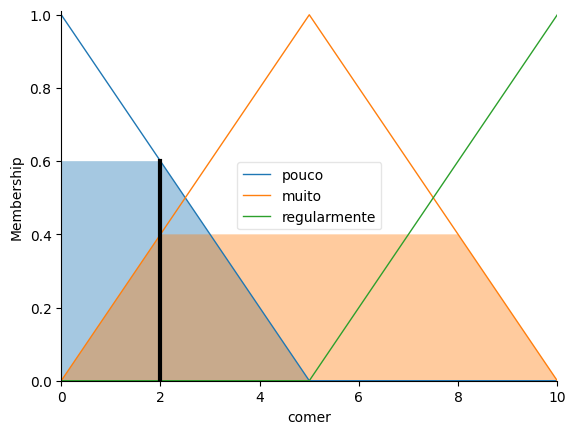

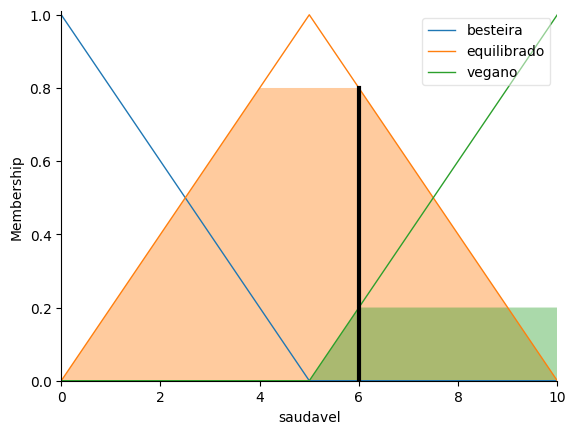

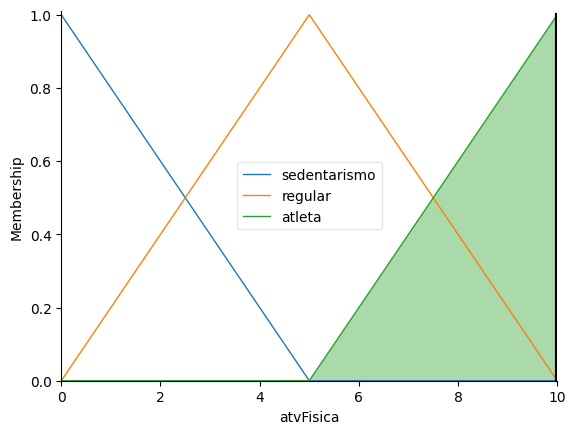

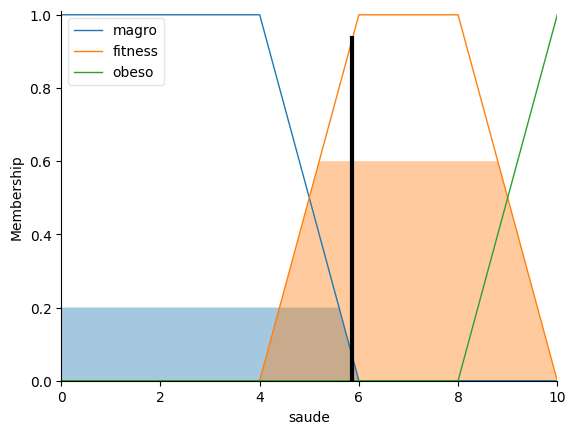

In [302]:
# Simulando
CalculoSaude = ctrl.ControlSystemSimulation(controlador)
print(list(CalculoSaude.ctrl.antecedents))

notaComida = int(input('Comer : pouco - regular - muito (0 a 10)=  '))
notaSaudavel = int(input('Saudavel : besteira - equilibrado - vegano  (0 a 10)  =  '))
notaAtvFisica = int(input('Atividade Fisica : sedentarismo - regular - atleta   (0 a 10) = '))

CalculoSaude.input['comer'] = notaComida
CalculoSaude.input['saudavel'] = notaSaudavel
CalculoSaude.input['atvFisica'] = notaAtvFisica
CalculoSaude.compute()

valorSaude = CalculoSaude.output['saude']

print(f"\nComer: {notaComida}\nSaudável: {notaSaudavel} \nAtividade Física: {notaAtvFisica}\nSaúde: {valorSaude:.2f}")



comer.view(sim=CalculoSaude)
saudavel.view(sim=CalculoSaude)
atvFisica.view(sim=CalculoSaude)
saude.view(sim=CalculoSaude)
plt.show()
